In [1]:
import os
import numpy as np
import sys
import pandas as pd
# root_folder = os.path.dirname(os.getcwd())
# sys.path.append(root_folder)
import utilities as rocku
import skimage as ski
import matplotlib.pyplot as plt

In [2]:
###################### need to change start
ipts="33767"
###################### need to change end
scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/radiographs"
# scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/autoreduce"
# scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/pixel_binned"
# scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/normalized"
scan_list = os.listdir(scan_loc)
sorted(scan_list, reverse=True)

['2024_09_03_Fe_nGI_15umG2']

In [3]:
ob_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/radiographs"
# ob_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/pixel_binned"
# ob_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/normalized"
# ob_loc = "/HFIR/CG1D/IPTS-" + ipts + "/raw/ob"
os.listdir(ob_loc)

['2024_09_03_Fe_nGI_15umG2']

In [4]:
dc_loc = "/HFIR/CG1D/IPTS-" + ipts + "/raw/dc"
# dc_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/pixel_binned"
# dc_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/normalized"
os.listdir(dc_loc)

['2024_09_03_Asym_stability', '2024_08_16_spheres_top333']

In [5]:
scan_name = "2024_09_03_Fe_nGI_15umG2"
ob_name = "2024_09_03_Fe_nGI_15umG2"
dc_name = "2024_09_03_Asym_stability"
#########################################
images_per_step = 1
out_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data"
xl_save_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/notes_photos/"
xl_save_to = xl_save_loc + scan_name + "_table.xlsx"
#########################################
if ob_name == scan_name:
    ob_name = None
scan_dir = os.path.join(scan_loc, scan_name)
out_dir = os.path.join(out_loc, scan_name)
file_list = os.listdir(scan_dir)
file_list = sorted(file_list, reverse=False)
dc_dir = os.path.join(dc_loc, dc_name)
dc_list = os.listdir(dc_dir)
dc_list = sorted(dc_list, reverse=False)
if ob_name is None:
    ob_dir = scan_dir
else:
    ob_dir = os.path.join(ob_loc, ob_name)
    ob_list = os.listdir(ob_dir)
    ob_list = sorted(ob_list, reverse=False)

In [6]:
to_remove_list = [
# '20230905_ACL_005_0090_0001.tiff',
#  '20230905_ACL_005_0090_0002.tiff',
#'20230913_ACL_150_0020_0001.tiff'
#       '20240208_ACL_093_0090_0012.tiff',
#     'ACL_152_0090_0001.tiff',
#  'ACL_152_0090_0002.tiff',
]
for to_remove in to_remove_list:
    file_list.remove(to_remove)
file_list

['ACL_078_0060_0001.tiff',
 'ACL_078_0060_0002.tiff',
 'ACL_078_0060_0003.tiff',
 'ACL_078_0060_0004.tiff',
 'ACL_078_0060_0005.tiff',
 'ACL_078_0060_0006.tiff',
 'ACL_078_0060_0007.tiff',
 'ACL_078_0060_0008.tiff',
 'ACL_078_0060_0009.tiff',
 'ACL_078_0060_0010.tiff',
 'ACL_078_0060_0011.tiff',
 'ACL_078_0060_0012.tiff',
 'ACL_084_0060_0001.tiff',
 'ACL_084_0060_0002.tiff',
 'ACL_084_0060_0003.tiff',
 'ACL_084_0060_0004.tiff',
 'ACL_084_0060_0005.tiff',
 'ACL_084_0060_0006.tiff',
 'ACL_084_0060_0007.tiff',
 'ACL_084_0060_0008.tiff',
 'ACL_084_0060_0009.tiff',
 'ACL_084_0060_0010.tiff',
 'ACL_084_0060_0011.tiff',
 'ACL_084_0060_0012.tiff',
 'ACL_090_0060_0001.tiff',
 'ACL_090_0060_0002.tiff',
 'ACL_090_0060_0003.tiff',
 'ACL_090_0060_0004.tiff',
 'ACL_090_0060_0005.tiff',
 'ACL_090_0060_0006.tiff',
 'ACL_090_0060_0007.tiff',
 'ACL_090_0060_0008.tiff',
 'ACL_090_0060_0009.tiff',
 'ACL_090_0060_0010.tiff',
 'ACL_090_0060_0011.tiff',
 'ACL_090_0060_0012.tiff',
 'ACL_096_0060_0001.tiff',
 

In [7]:
len(file_list)

408

In [8]:
idx_list = []
pos_list = []
ob_first_idx = None
ob_last_idx = None
for ea in file_list:
    if 'open' not in ea:
        _split = ea.split('_')
        _str = _split[-1]
        _pos = _split[1]
#     _pos = _split[2]
        _idx = _str.split('.')[0]
        idx_list.append(int(_idx))
        pos_list.append(int(_pos))
num_of_img = max(idx_list)
pos1 = max(pos_list)
pos2 = min(pos_list)
pos1_str = 'ACL_' + "{:03d}".format(pos1)
pos2_str = 'ACL_' + "{:03d}".format(pos2)
idx_str = '_' + "{:04d}".format(1)
pos_file_list = []
for e in file_list:
    if pos1_str in e or pos2_str in e:
        if idx_str in e:
            pos_file_list.append(e)
# pos_file_list.append('20230901_ACL_95_0090_0001.tiff')
pos_file_list

['ACL_078_0060_0001.tiff', 'ACL_270_0060_0001.tiff']

Text(0.5, 1.0, 'last image')

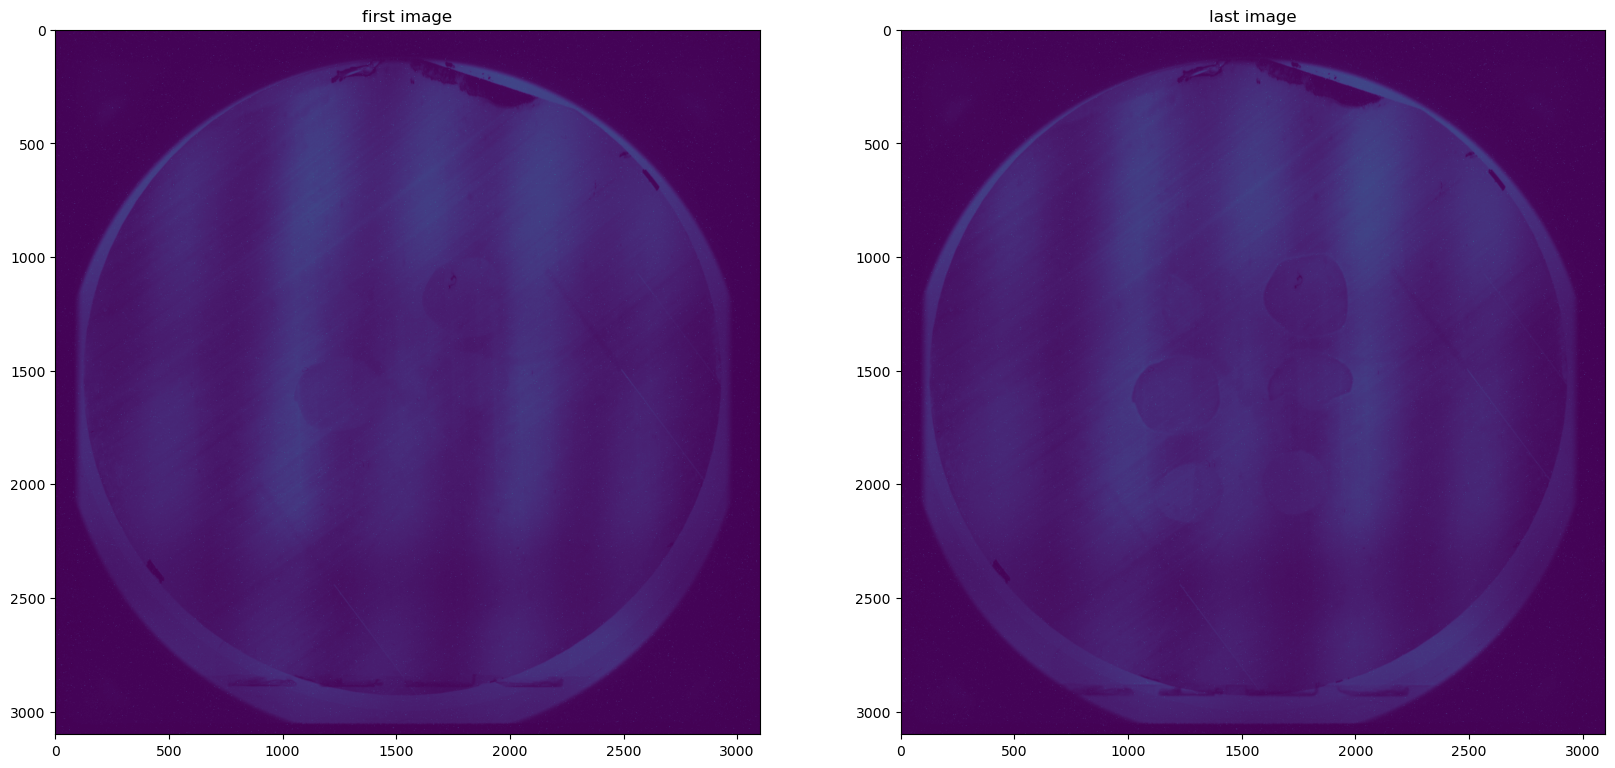

In [9]:
img1 = ski.io.imread(os.path.join(scan_dir, pos_file_list[0]))
img2 = ski.io.imread(os.path.join(scan_dir, pos_file_list[1]))
f, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].imshow(img1)
ax[0].set_title('first image')

ax[1].imshow(img2)
ax[1].set_title('last image')

# ax[2].imshow(img_min)
# ax[2].set_title('np.min')

Text(0.5, 1.0, 'last image')

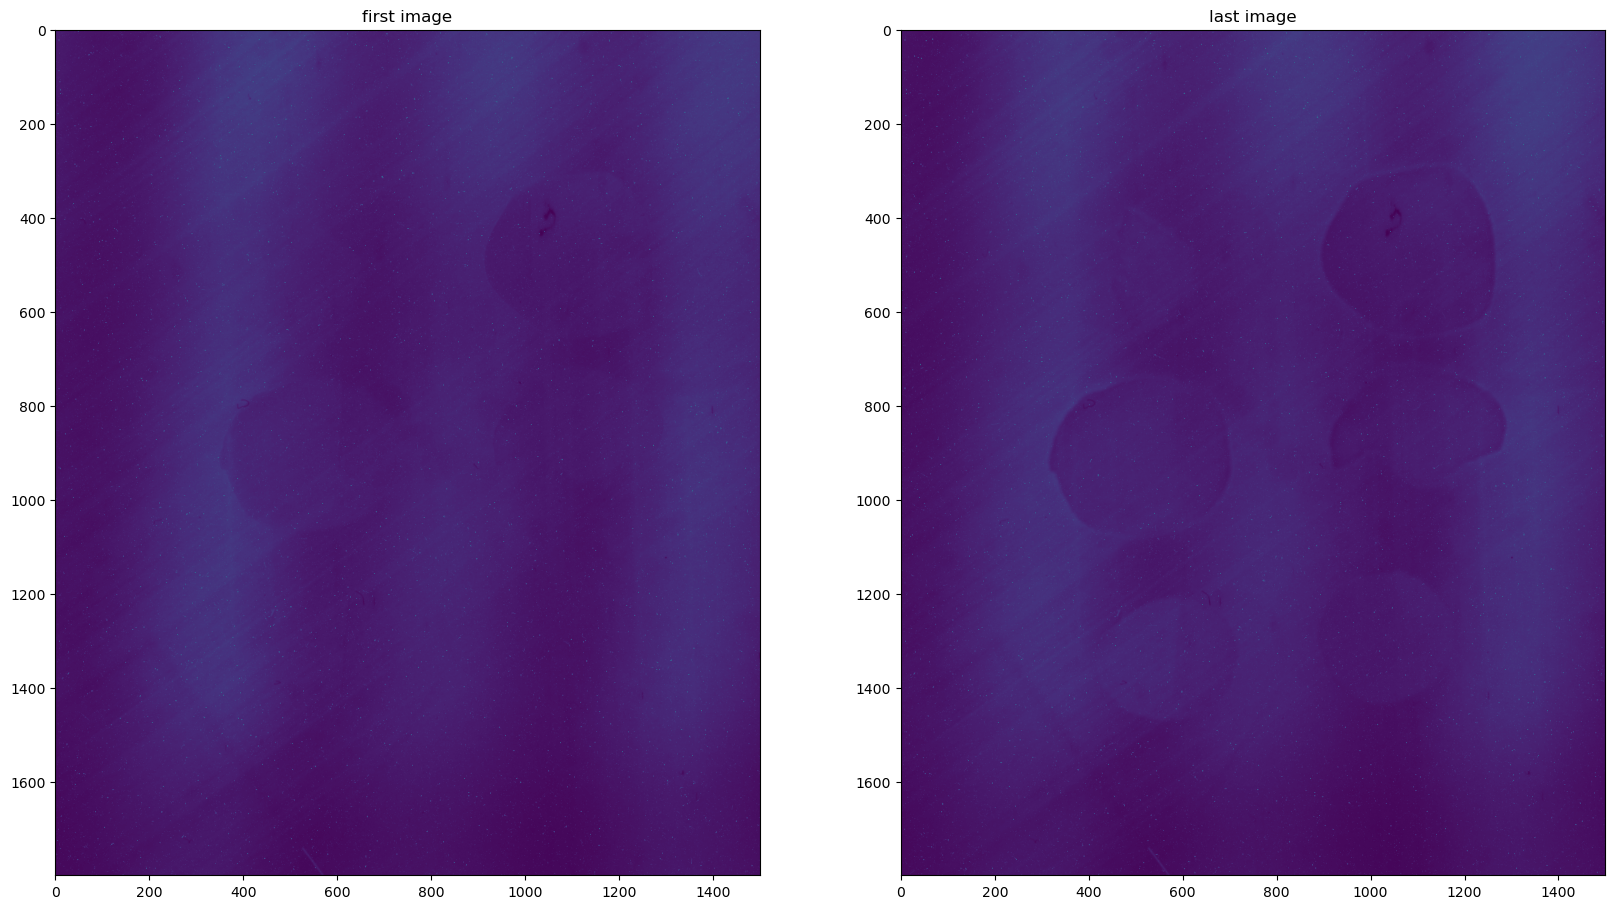

In [10]:
###################### need to change start
# crop = False
crop = True
crop_left = 700#950#150 #205
crop_right = 2200#5300#1960
crop_top = 700#1000#90#90 140
crop_bottom = 2500#5250#1980 #1760
###################### need to change end
if not crop:
    crop_left = 0
    crop_right = img1.shape[0]
    crop_top = 0
    crop_bottom = img1.shape[1]
img1_crop = rocku.crop(img1, crop_left, crop_right, crop_top, crop_bottom, crop)
img2_crop = rocku.crop(img2, crop_left, crop_right, crop_top, crop_bottom, crop)

f, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].imshow(img1_crop)#, vmax=20000)
ax[0].set_title('first image')

ax[1].imshow(img2_crop)#, vmax=20000)
ax[1].set_title('last image')

In [11]:
if len(file_list)%num_of_img == 0:
    first_file_list = file_list[0::num_of_img]
    if ob_name is None:
        for idx_1st, e_first in enumerate(first_file_list):
            if 'open' in e_first:
                ob_first_idx = idx_1st
        ob_first = first_file_list[ob_first_idx]
        first_file_list.pop(ob_first_idx)
    else:
        ob_first = ob_list[0]
#     ob_first = first_file_list[ob_first_idx]
#     first_file_list.pop(ob_first_idx)
    data_first = first_file_list[:]
    dc_first = dc_list[0]
    last_file_list = file_list[num_of_img-1::num_of_img]
    if ob_name is None:
        for idx_last, e_last in enumerate(last_file_list):
            if 'open' in e_last:
                ob_last_idx = idx_last
        ob_last = last_file_list[ob_last_idx]
        last_file_list.pop(ob_last_idx)
    else:
        ob_last = ob_list[-1]
    data_last = last_file_list[:]
    dc_last = dc_list[-1]
    df = pd.read_excel("/HFIR/CG1D/IPTS-26647/shared/notes_photos/nGI_multiACL_temp.xlsx", engine='openpyxl', nrows=0)
    info_dict = {}
    for i, e_col in enumerate(df.columns):
        info_dict[i] = []
    for idx, e_file in enumerate(data_first):
        info_dict[0].append(os.path.join(scan_dir, e_file)) # first_data_file
        info_dict[1].append(os.path.join(scan_dir, last_file_list[idx])) # last_data_file
        info_dict[2].append(os.path.join(ob_dir, ob_first)) # first_ob_file
        info_dict[3].append(os.path.join(ob_dir, ob_last)) # last_ob_file
        info_dict[4].append(os.path.join(dc_dir, dc_first)) # first_dc_file
        info_dict[5].append(os.path.join(dc_dir, dc_last)) # last_dc_file
        info_dict[6].append(1) # period
        info_dict[7].append(images_per_step) # images_per_step
        info_dict[8].append(0) # rotation
        info_dict[9].append('EM Fit') # fit_procedure
        info_dict[10].append([crop_top, crop_bottom, crop_left, crop_right])
        info_dict[11].append('yes') # gamma_filter_data_ob
#         info_dict[11].append('no') # gamma_filter_data_ob
        info_dict[12].append(35) # data_threshold_3x3
        info_dict[13].append(55) # data_threshold_5x5
        info_dict[14].append(80) # data_threshold_7x7
        info_dict[15].append(0.8) # data_sigma_log
        info_dict[16].append('yes') # gamma_filter_dc
#         info_dict[16].append('no') # gamma_filter_dc
        info_dict[17].append(20) # dc_threshold_3x3
        info_dict[18].append(40) # dc_threshold_5x5
        info_dict[19].append(60) # dc_threshold_7x7
        info_dict[20].append(0.8) # dc_sigma_log
#         info_dict[21].append('yes') # dc_outlier_removal
        info_dict[21].append('no') # dc_outlier_removal
        info_dict[22].append(1.5) # dc_outlier_value
        info_dict[23].append(out_dir) # result_directory
        info_dict[24].append('ACL_' + "{:03d}".format(int(e_file.split('_')[1]))) # file_id
        info_dict[25].append('') # sample_information
        info_dict[26].append('') # used_environment
        info_dict[27].append('') # osc_pixel
    for i, e_col in enumerate(df.columns):
        df[e_col] = info_dict[i]
    df.to_excel(xl_save_to, index=False, sheet_name='Tabelle1')
else:
    print("Need to clean/reorg files before continue.")
info_dict[24]

['ACL_078',
 'ACL_084',
 'ACL_090',
 'ACL_096',
 'ACL_102',
 'ACL_108',
 'ACL_114',
 'ACL_120',
 'ACL_126',
 'ACL_132',
 'ACL_138',
 'ACL_144',
 'ACL_150',
 'ACL_156',
 'ACL_162',
 'ACL_168',
 'ACL_174',
 'ACL_180',
 'ACL_186',
 'ACL_192',
 'ACL_198',
 'ACL_204',
 'ACL_210',
 'ACL_216',
 'ACL_222',
 'ACL_228',
 'ACL_234',
 'ACL_240',
 'ACL_246',
 'ACL_252',
 'ACL_258',
 'ACL_264',
 'ACL_270']

# Merge short spreadsheets

In [103]:
xl_list = os.listdir(xl_save_loc)
xl_list

['merged.xlsx',
 '2024_04_25_quad_cell_insitu_5uAcm2_5h_table.xlsx',
 '2024_04_25_quad_cell_insitu_5uAcm2_1h_table.xlsx',
 '2024_04_25_quad_cell_insitu_20uAcm2_5h_table.xlsx',
 '2024_04_25_quad_cell_insitu_1uAcm2_table.xlsx',
 '2024_04_28_cell_fresh_table.xlsx',
 '2024_04_25_quad_cell_insitu_40uAcm2_5h_table.xlsx',
 '2024_04_25_quad_cell_insitu_10uAcm2_5h_table.xlsx',
 '2024_04_25_quad_cell_insitu_40uAcm2_10h_table.xlsx',
 '2024_04_25_quad_cell_fresh_test01_table.xlsx',
 '2024_04_25_quad_cell_insitu_200uAcm2_final_table.xlsx']

In [84]:
xl_list = os.listdir(xl_save_loc)
xl_list

['merged.xlsx',
 '2024_04_25_quad_cell_insitu_5uAcm2_5h_table.xlsx',
 '2024_04_25_quad_cell_insitu_5uAcm2_1h_table.xlsx',
 '2024_04_25_quad_cell_insitu_20uAcm2_5h_table.xlsx',
 '2024_04_25_quad_cell_insitu_1uAcm2_table.xlsx',
 '2024_04_25_quad_cell_insitu_40uAcm2_5h_table.xlsx',
 '2024_04_25_quad_cell_insitu_10uAcm2_5h_table.xlsx',
 '2024_04_25_quad_cell_insitu_40uAcm2_10h_table.xlsx',
 '2024_04_25_quad_cell_fresh_test01_table.xlsx']

In [85]:
to_rmv = ['merged.xlsx',
 '2024_04_25_quad_cell_insitu_5uAcm2_5h_table.xlsx',
 '2024_04_25_quad_cell_insitu_5uAcm2_1h_table.xlsx',
 '2024_04_25_quad_cell_insitu_1uAcm2_table.xlsx',
 '2024_04_25_quad_cell_insitu_10uAcm2_5h_table.xlsx',
 '2024_04_25_quad_cell_fresh_test01_table.xlsx']
xl_list = rocku.remove_fnames(xl_list, to_rmv)

9
3


In [86]:
xl_df_list = []
for each_xl in xl_list:
    _df_xl = pd.read_excel(os.path.join(xl_save_loc,each_xl))
    if len(_df_xl)<10:
        print("Merging: {}".format(each_xl))
        xl_df_list.append(_df_xl)
merged = pd.concat(xl_df_list, axis=0, ignore_index=True)

Merging: 2024_04_25_quad_cell_insitu_20uAcm2_5h_table.xlsx
Merging: 2024_04_25_quad_cell_insitu_40uAcm2_5h_table.xlsx
Merging: 2024_04_25_quad_cell_insitu_40uAcm2_10h_table.xlsx


In [87]:
merged.to_excel(xl_save_loc + "merged.xlsx", index=False, sheet_name='Tabelle1')